# 通道域（Channel Domain）—— SE Block（Image Classification）

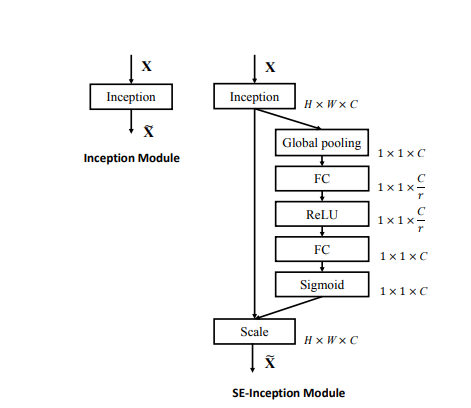# 

In [3]:
import tensorflow as tf
from tensorflow.keras import *
import numpy as np

class SEBlock(layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape, ratio = 8): 
        super().build(input_shape)
        self.layer_gap = layers.GlobalAveragePooling2D()
        self.layer_dense0 = layers.Dense(input_shape[-1] // ratio, activation='relu')
        self.layer_dense1 = layers.Dense(input_shape[-1], activation='sigmoid')
        
    def call(self, x, training=True, **kwargs):
        x1 = self.layer_gap(x)
        x1 = self.layer_dense0(x1)
        x1 = self.layer_dense1(x1)
        x1 = tf.reshape(x1, (-1, 1, 1, x1.shape[-1]))
        return x1 * x
    
    
model = tf.keras.Sequential(
[
    Input(shape=(256, 256, 3)),
    layers.Conv2D(16, 3, 1),
    SEBlock(),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(10),
    layers.Activation('softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
attention_spatial_domain_1 ( (None, 254, 254, 16)      82        
_________________________________________________________________
global_average_pooling2d_1 ( (None, 16)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 700
Trainable params: 700
Non-trainable params: 0
________________________________________________________

# 空间域 (spatial domain)

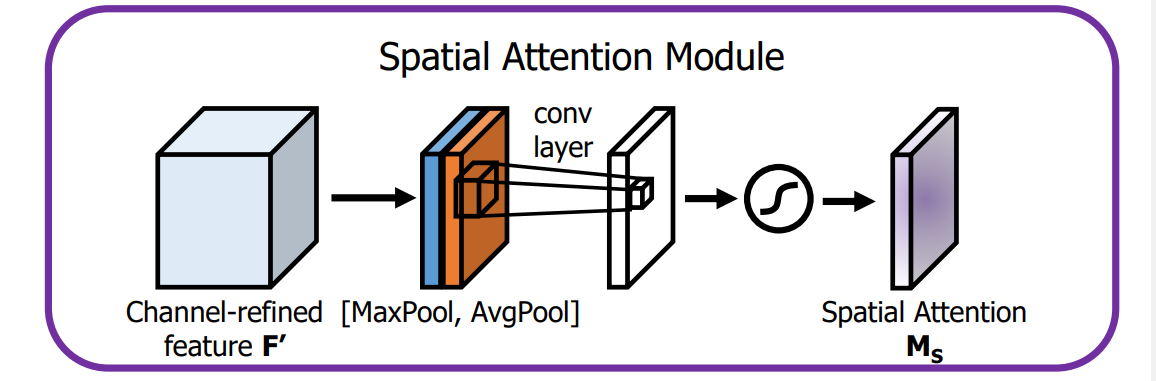# 

In [6]:
import tensorflow as tf
from tensorflow.keras import *
import numpy as np

class AttentionSpatialDomain(layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        super().build(input_shape)
        self.layer_conv1 = layers.Conv2D(1, kernel_size=(7, 7), padding='same')
        self.layer_sigmoid = layers.Activation('sigmoid')
        
    def call(self, x, training=True, **kwargs):
        x1 = tf.concat([tf.math.reduce_max(x, axis=-1, keepdims=True), 
                        tf.math.reduce_mean(x, axis=-1, keepdims=True)], axis=-1)
        x1 = self.layer_conv1(x1, training=training)
        x1 = self.layer_sigmoid(x1)
        return x1 * x
    
    
model = tf.keras.Sequential(
[
    Input(shape=(256, 256, 3)),
    layers.Conv2D(16, 3, 1),
    AttentionSpatialDomain(),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(10),
    layers.Activation('softmax')
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
attention_spatial_domain_5 ( (None, 254, 254, 16)      3         
_________________________________________________________________
global_average_pooling2d_5 ( (None, 16)                0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 621
Trainable params: 621
Non-trainable params: 0
________________________________________________________